In [7]:
from scipy.optimize import rosen, minimize, rosen_der, rosen_hess
import numpy as np, pandas as pd
A = np.array([[4, 1], [1, 2]])
b = np.array([1,  -3.])
def qfunc(x1, x2):
    x = np.array([x1, x2])
    return 0.5 * x.dot(A.dot(x)) + b.dot(x)
def qfunc_sp(x):
    return 0.5 * x.dot(A.dot(x)) + b.dot(x)
def grad(x):
    return A.dot(x) + b
qfunc = np.vectorize(qfunc)
data_dict={'method': [], 'value': [], 'x1': [], 'x2': [], 'iter': []}
for method in ["CG", 'Powell']:
    iterval = 0
    def callback_function(xcurr):
        global iterval
        
        data_dict['method'].append(method)
        data_dict['value'].append(rosen(xcurr))
        data_dict['x1'].append(xcurr[0])
        data_dict['x2'].append(xcurr[-1])
        data_dict['iter'].append(iterval)
        iterval += 1
    x0 = [1.5, -0.5]

    data_dict['method'].append(method)
    data_dict['value'].append(rosen(x0))
    data_dict['x1'].append(x0[0])
    data_dict['x2'].append(x0[-1])
    data_dict['iter'].append(iterval)
    iterval += 1
    minimize(qfunc_sp, x0, method=method, jac=grad, callback=callback_function)
    # break

df = pd.DataFrame(data_dict)

/tmp/ipykernel_25372/2855091885.py:33: RuntimeWarning: Method Powell does not use gradient information (jac).
  minimize(qfunc_sp, x0, method=method, jac=grad, callback=callback_function)


In [ ]:
df.to_csv('rosen_records.csv')

/tmp/ipykernel_25372/2771335066.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
MovieWriter ffmpeg unavailable; using Pillow instead.


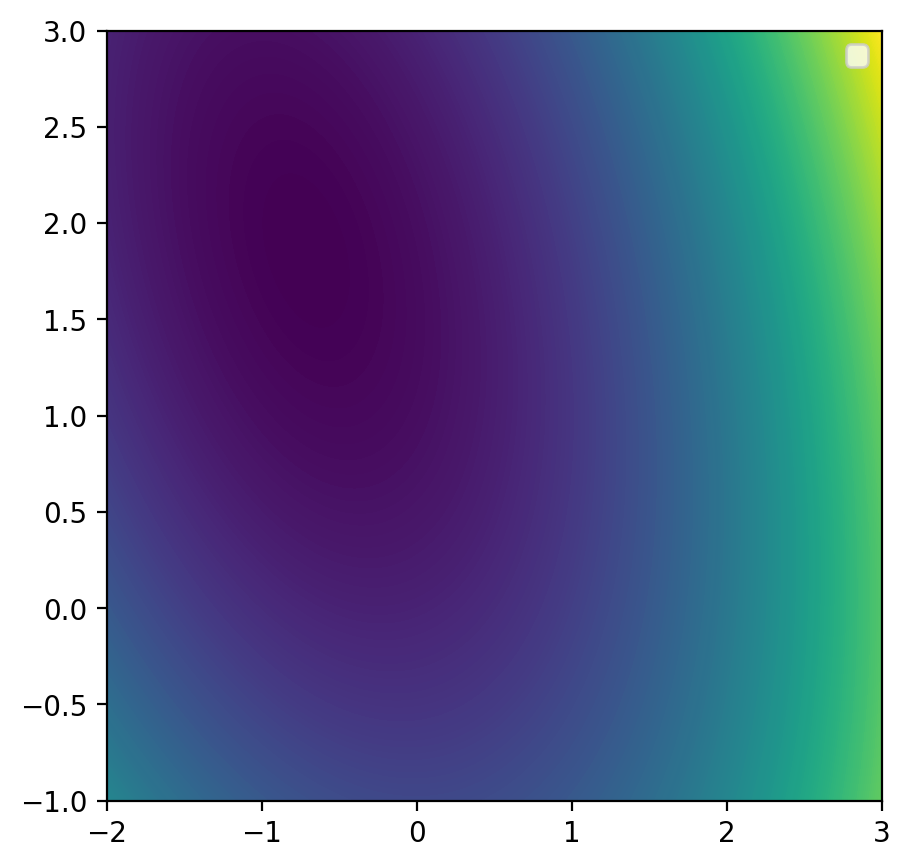

In [8]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt

cgdf = df.query('method == "CG"')
xv = cgdf['x1'].to_numpy()
yv = cgdf['x2'].to_numpy()
fig, ax = plt.subplots(dpi=200, figsize=(5,5))
# 100. * (x[i+1] - x[i]) * (x[i+1] - x[i]) + (1. - x[i]) * (1. - x[i])
x = np.linspace(-2, 3, 250)
y = np.linspace(-1, 3, 250)
X, Y = np.meshgrid(x, y)
Z = qfunc(X, Y)#100 * (Y-X**2)**2 +(1-X)**2

ax.contourf(X, Y, Z, levels=260)
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t
frame=0
# scat = ax.scatter([xy1[0][0], xy2[0][0], xy3[0][0]], [xy1[1][0], xy2[1][0], xy3[1][0]], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot([xv[frame]], [yv[frame]], color='r')[0]
# ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()

def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    # data = np.stack([x, y]).T
    
    # line2 = ax.plot([xy1[0][frame], xy2[0][frame], xy3[0][frame], xy1[0][frame],], [xy1[1][frame], xy2[1][frame], xy3[1][frame],xy1[1][frame],], color='r')[0]
    # update the line plot:
    line2.set_xdata(xv[:frame])
    line2.set_ydata(yv[:frame])
    return line2


ani = animation.FuncAnimation(fig=fig, func=update, frames=60, interval=200)
# plt.show()
ani.save('cgquad.gif', dpi=300)

/tmp/ipykernel_25372/2114819360.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
MovieWriter ffmpeg unavailable; using Pillow instead.


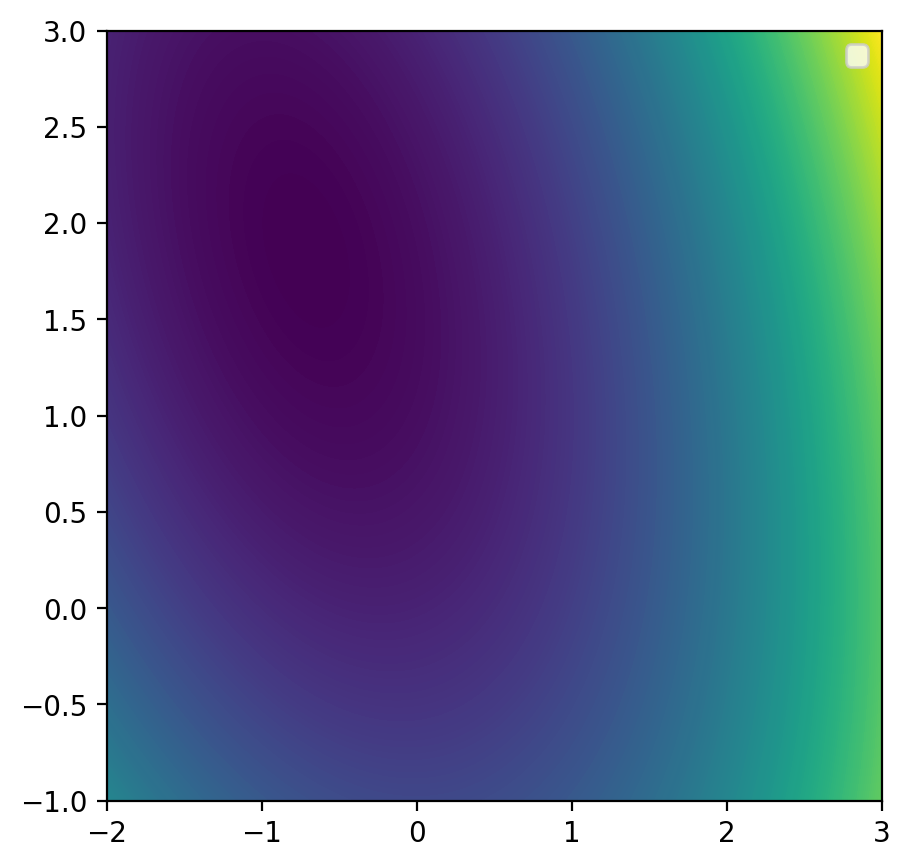

In [9]:
cgdf = df.query('method == "Powell"')
xv = cgdf['x1'].to_numpy()
yv = cgdf['x2'].to_numpy()
fig, ax = plt.subplots(dpi=200, figsize=(5,5))
# 100. * (x[i+1] - x[i]) * (x[i+1] - x[i]) + (1. - x[i]) * (1. - x[i])
x = np.linspace(-2, 3, 250)
y = np.linspace(-1, 3, 250)
X, Y = np.meshgrid(x, y)
Z = qfunc(X, Y)#100 * (Y-X**2)**2 +(1-X)**2

ax.contourf(X, Y, Z, levels=260)
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t
frame=0
# scat = ax.scatter([xy1[0][0], xy2[0][0], xy3[0][0]], [xy1[1][0], xy2[1][0], xy3[1][0]], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot([xv[frame]], [yv[frame]], color='r')[0]
# ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()

def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    # data = np.stack([x, y]).T
    
    # line2 = ax.plot([xy1[0][frame], xy2[0][frame], xy3[0][frame], xy1[0][frame],], [xy1[1][frame], xy2[1][frame], xy3[1][frame],xy1[1][frame],], color='r')[0]
    # update the line plot:
    line2.set_xdata(xv[:frame])
    line2.set_ydata(yv[:frame])
    return line2


ani = animation.FuncAnimation(fig=fig, func=update, frames=60, interval=200)
# plt.show()
ani.save('powellquad.gif', dpi=300)

In [65]:
df['fval'] = rosen(np.stack([df['x1'], df['x2']]))
nmdf = pd.read_csv('nelder_mead_fval.csv')
nmdf['method'] = 'Nelder-Mead'
df = pd.concat([df, nmdf]).reset_index(drop=True)
df

,method,value,x1,x2,iter,fval
0,CG,2501.000000,-1.000000,2.000000,0,1.040000e+02
1,CG,322.495162,-0.755154,1.020127,1,2.331881e+01
2,CG,6.068996,-0.083775,-0.349732,2,1.390167e+01
3,CG,1.643095,0.085053,-0.280148,3,9.095950e+00
4,CG,1.417495,0.011772,-0.175361,4,4.056597e+00
...,...,...,...,...,...,...
160,Nelder-Mead,NaN,0.998499,0.997331,55,1.319277e-05
161,Nelder-Mead,NaN,0.999544,0.998678,56,7.569240e-06
162,Nelder-Mead,NaN,0.999544,0.998678,57,3.008425e-06
163,Nelder-Mead,NaN,0.999667,0.999406,58,6.351464e-07


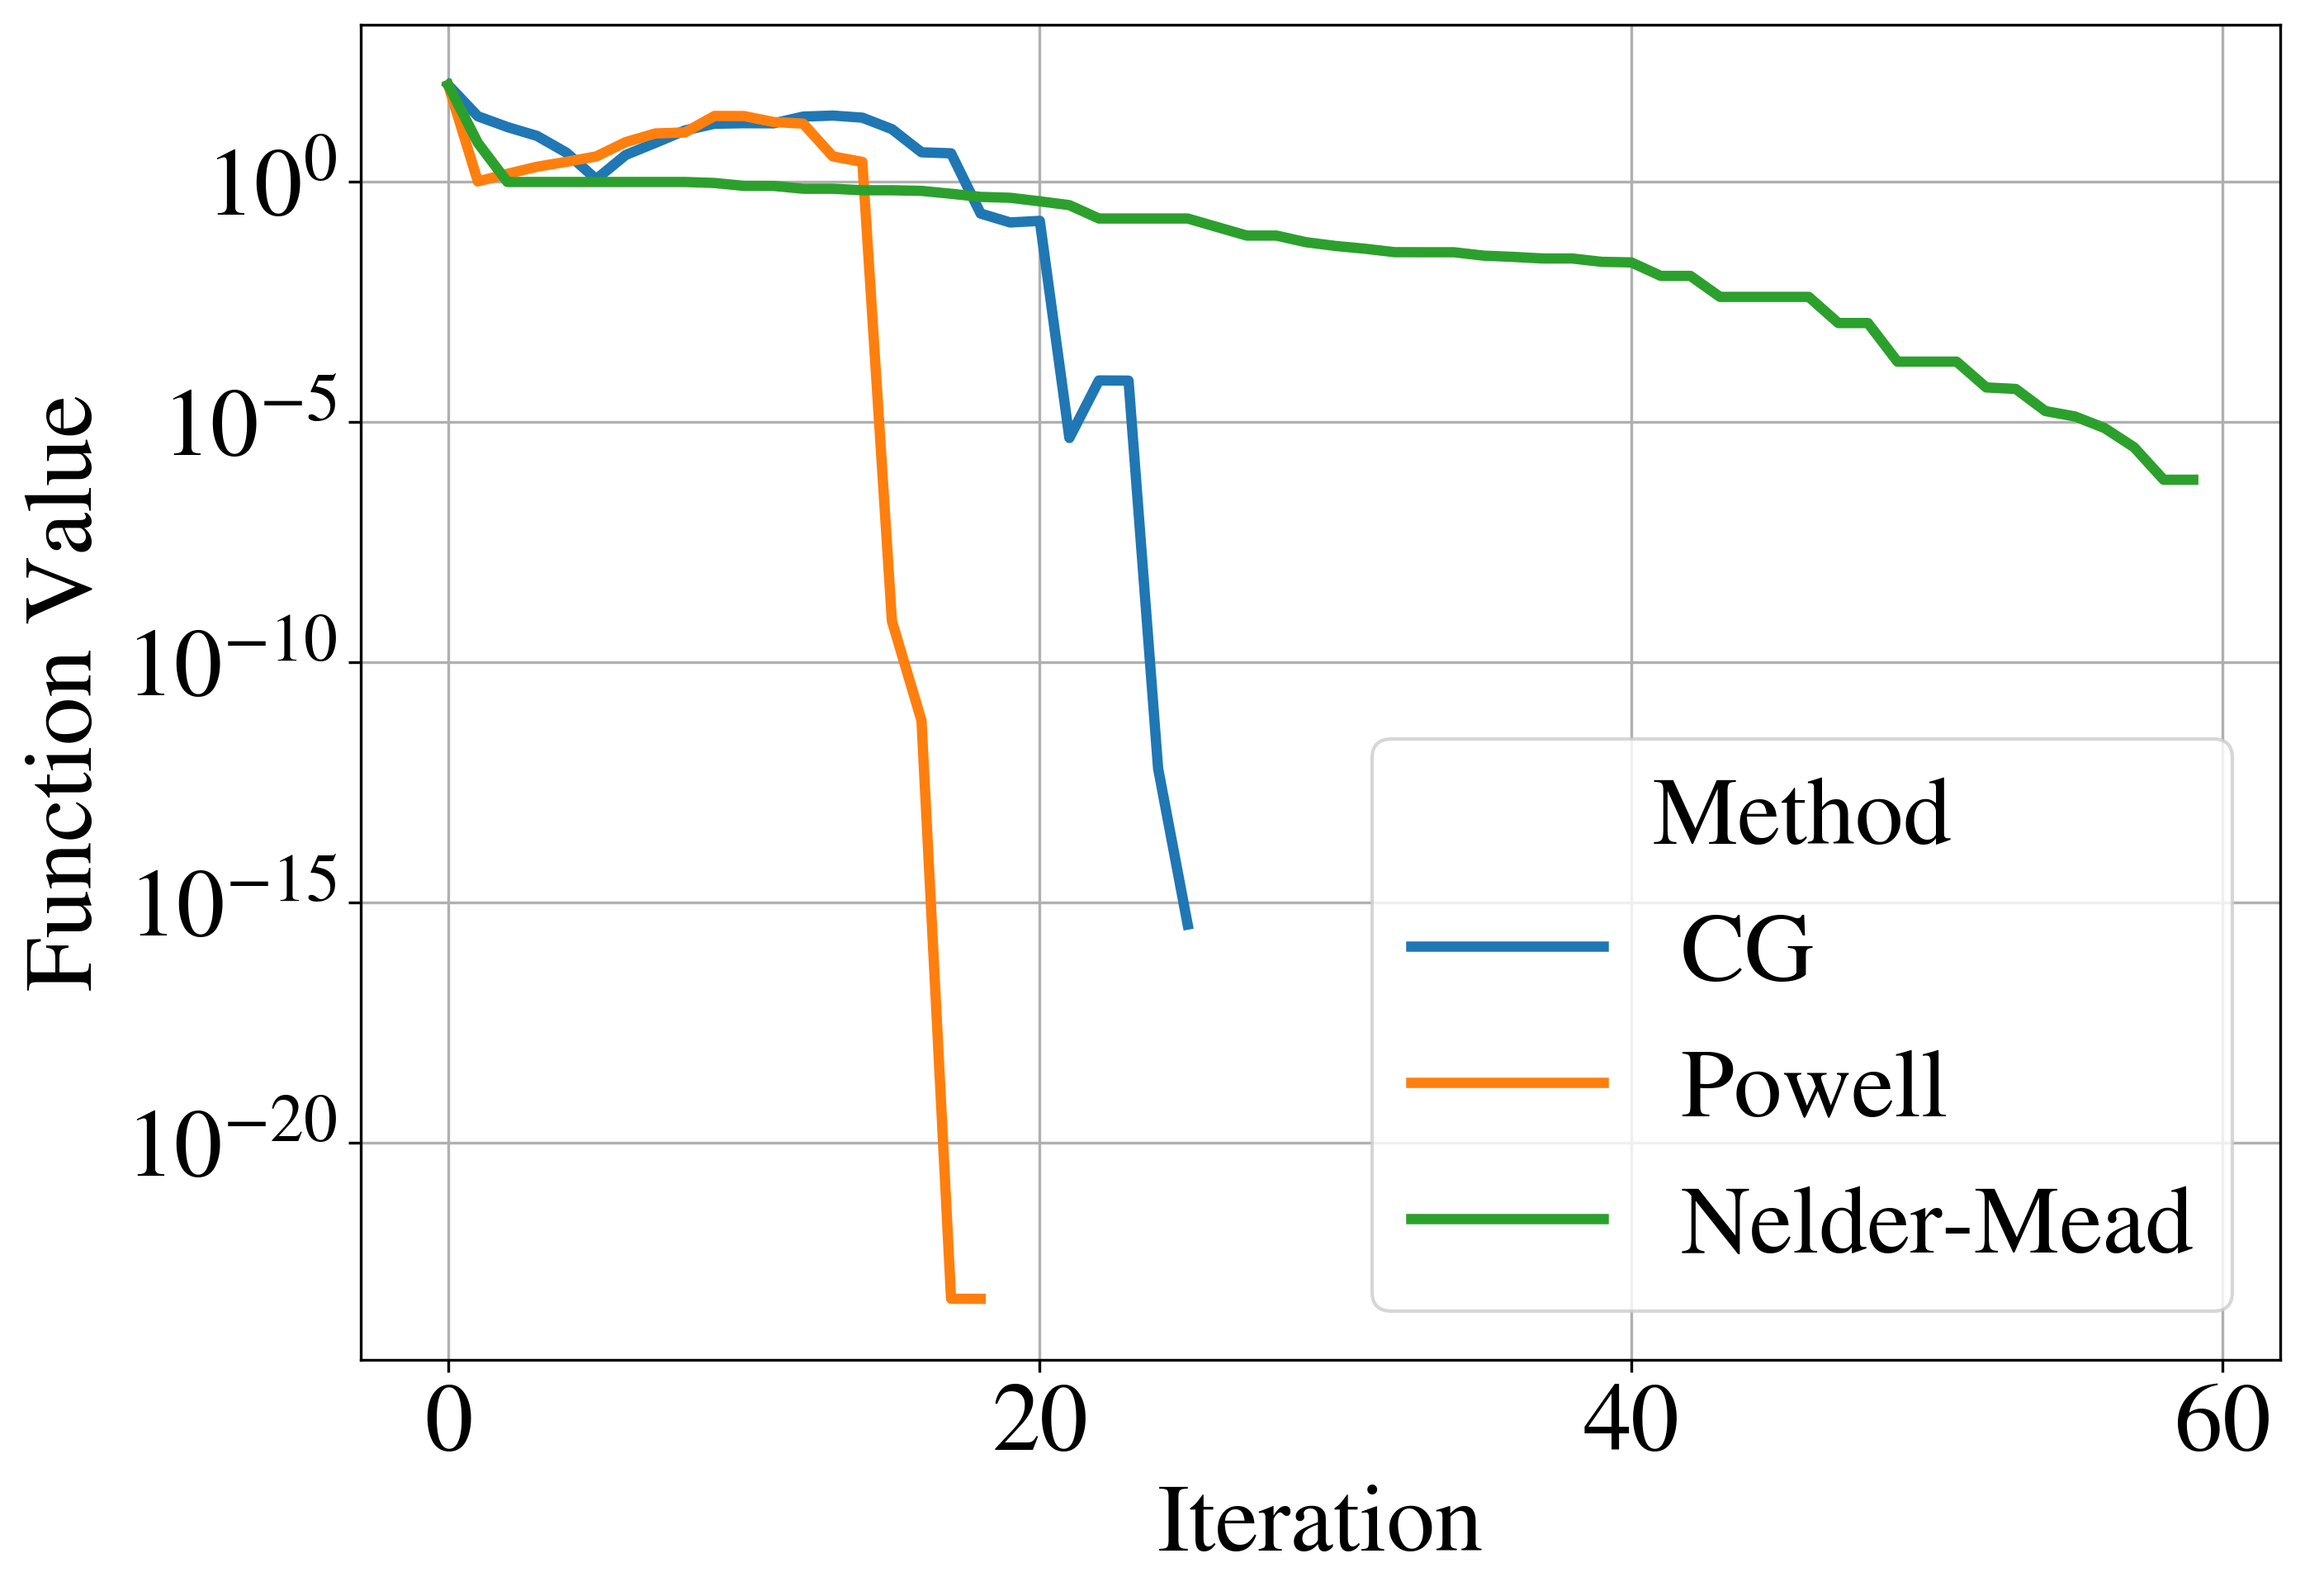

In [71]:
import seaborn as sns
import sys
import os
sys.path.insert(0, os.environ['PLOT_SETTINGS_DIR'])
import plot_settings

fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(df, x='iter',y='fval', hue='method', linewidth=3)
ax.legend_.set_title('Method')
ax.grid()
ax.set_xlabel('Iteration')
ax.set_ylabel('Function Value')
ax.set_yscale('log')
fig.savefig('fval.pdf', bbox_inches='tight')